# Training Classfier from data sets

## Input:  tsv formatted file with at least two classes 0/1.  Here's an example

In [9]:
# Combine two files, 0 and 1 classes into one for training the classifier

# Assuming input files have columns:
# url, end_url, word_count, visible_text
# And we want output files with 
# url, class, visible_text
#
filenames = [
    ('data/170915_manual_no_suppress_noforext_content_evaluate_lang_filtered_visible.tsv', 0),
    ('data/170915_manual_tech_consult_noforext_content_evaluate_lang_filtered_visible.tsv', 1)
]
target_file = 'data/170915_manual_tech_consult_training_data_{}_{}.tsv'.format(
    filenames[0][1], filenames[1][1])


with open(target_file, 'w') as outfile:
    for tup_fname in filenames:
        with open(tup_fname[0]) as infile:
            for line in infile:
                url, end_url, word_count, visible_text = line.split('\t')
                outfile.write("{}\t{}\t{}\n".format(url.strip(), tup_fname[1], visible_text.strip()))

print "DONE! File written to {}".format(target_file)


DONE! File written to data/170915_manual_tech_consult_training_data_0_1.tsv


In [10]:
# View sample data
import pandas as pd
data = pd.read_csv(target_file, delimiter='\t', header=None, encoding='utf-8')
print len(data), "lines found in output file {}".format(target_file)
data.loc[data[1] == 1]
data.head()

4946 lines found in output file data/170915_manual_tech_consult_training_data_0_1.tsv


,0,1,2
0,url,0,validate_url: no response
1,16500.com,0,home 16500 line card manufacturers quick link ...
2,1800contacts.com,0,contact lenses at 1-800 contacts world's large...
3,303taxi.com,0,"taxi cab service chicago suburbs, ohare and mi..."
4,320westsanantonio.com,0,a php error was encountered severity: notice m...


Opening data/170915_manual_tech_consult_training_data_0_1.tsv for data and loading X,Y classes

Count of classes loaded:
HERE!_> <type 'numpy.ndarray'>
Training Model ...
Start an iteration
Creating classifier from clf_factory()
Using LogisticRegression classifier
Fitting model to X, y training data, this may take a while...
DONE training, saving model.
Model is saved!
precision: [ 0.54610564  0.54569892  0.54618834 ...,  1.          1.          1.        ]
recall: [ 1.          0.99836066  0.99836066 ...,  0.00327869  0.00163934  0.        ]
CALLING PLOT_PR


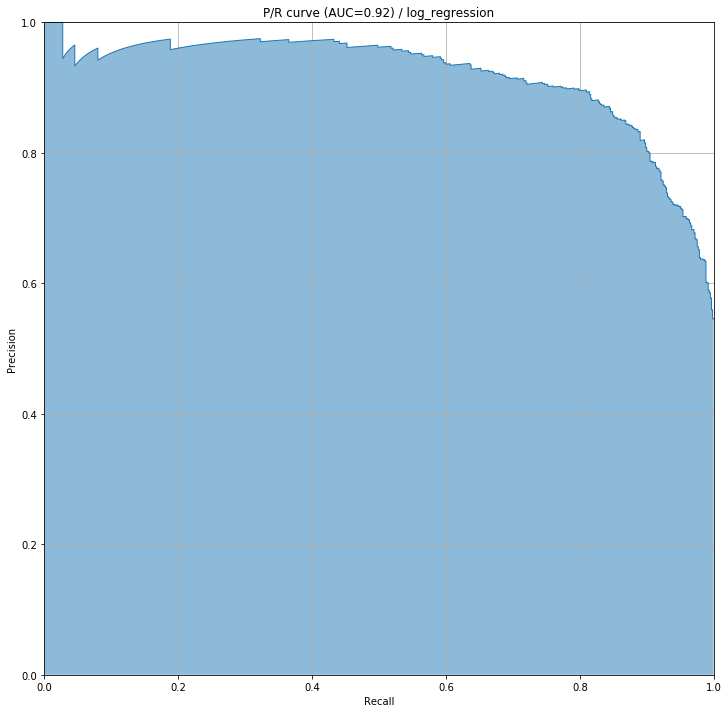

Mean: 0.861	STD: 0.000	MEAN_SCORES	0.919	STD_SCORES:	0.000	
0.0908845738943 0.139046079224
CPU times: user 1min 4s, sys: 1.28 s, total: 1min 5s
Wall time: 1min 5s


In [11]:
%%time
%matplotlib inline
import pandas as pd
import os
import numpy as np
import time

import classification.train_classifier as bc
import classification.utils as utils

## ***** INPUTS ***** 
data_source_file = target_file
class_type = "log_regression" # svm bayes log_regression
base_file = os.path.basename(target_file).replace('.tsv', '')
save_path = "data/model_{}_{}".format(class_type, base_file)
## **** END INPUTS ****


models = {
    'svm': bc.create_svm_model,
    'bayes': bc.create_ngram_model,
    'log_regression': bc.create_lg_model
}

for class_type in ["log_regression"]: #,"bayes","svm"]:
    classifier = models[class_type] 

    print "Opening {} for data and loading X,Y classes".format(data_source_file)
    data = pd.read_csv(data_source_file, delimiter='\t', encoding='utf-8')

    X_orig = data.iloc[:, 2].values
    Y_orig = data.iloc[:, 1].values

    print "\nCount of classes loaded:"
    classes = np.unique(Y_orig)

    pos_neg = np.logical_or(Y_orig == 1, Y_orig == 0)
    X = X_orig[pos_neg]
    Y = Y_orig[pos_neg]

    Y = utils.tweak_labels(Y, [1])

    print "Training Model ..."
    bc.train_model(classifier, X, Y, save_path, class_type, plot=True);
